<a href="https://colab.research.google.com/github/Lupoyo/projectNew/blob/main/Popular_Spotify_Songs_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import chardet

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path='/content/drive/MyDrive/Popular_Spotify_Songs.csv'

In [ ]:
with open(file_path, 'rb') as f:
    result = chardet.detect(f.read())
    encoding = result['encoding']
    print(f"Detected encoding: {encoding}")


Detected encoding: ISO-8859-1


In [ ]:
    df = pd.read_csv(file_path, encoding=encoding)


In [ ]:
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [ ]:
df.isnull().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')
df['in_deezer_playlists'] = pd.to_numeric(df['in_deezer_playlists'], errors='coerce')
df['in_shazam_charts'] = pd.to_numeric(df['in_shazam_charts'], errors='coerce')


In [ ]:
df.isnull().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  1
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists     79
in_deezer_charts         0
in_shazam_charts        57
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

In [ ]:
df.dropna(subset=['streams', 'in_deezer_playlists', 'in_shazam_charts', 'key'], inplace=True)


In [ ]:
import warnings
warnings.filterwarnings("ignore", message="use_inf_as_na option is deprecated*", category=FutureWarning)

# Replace infinite values with NaN and then drop them
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

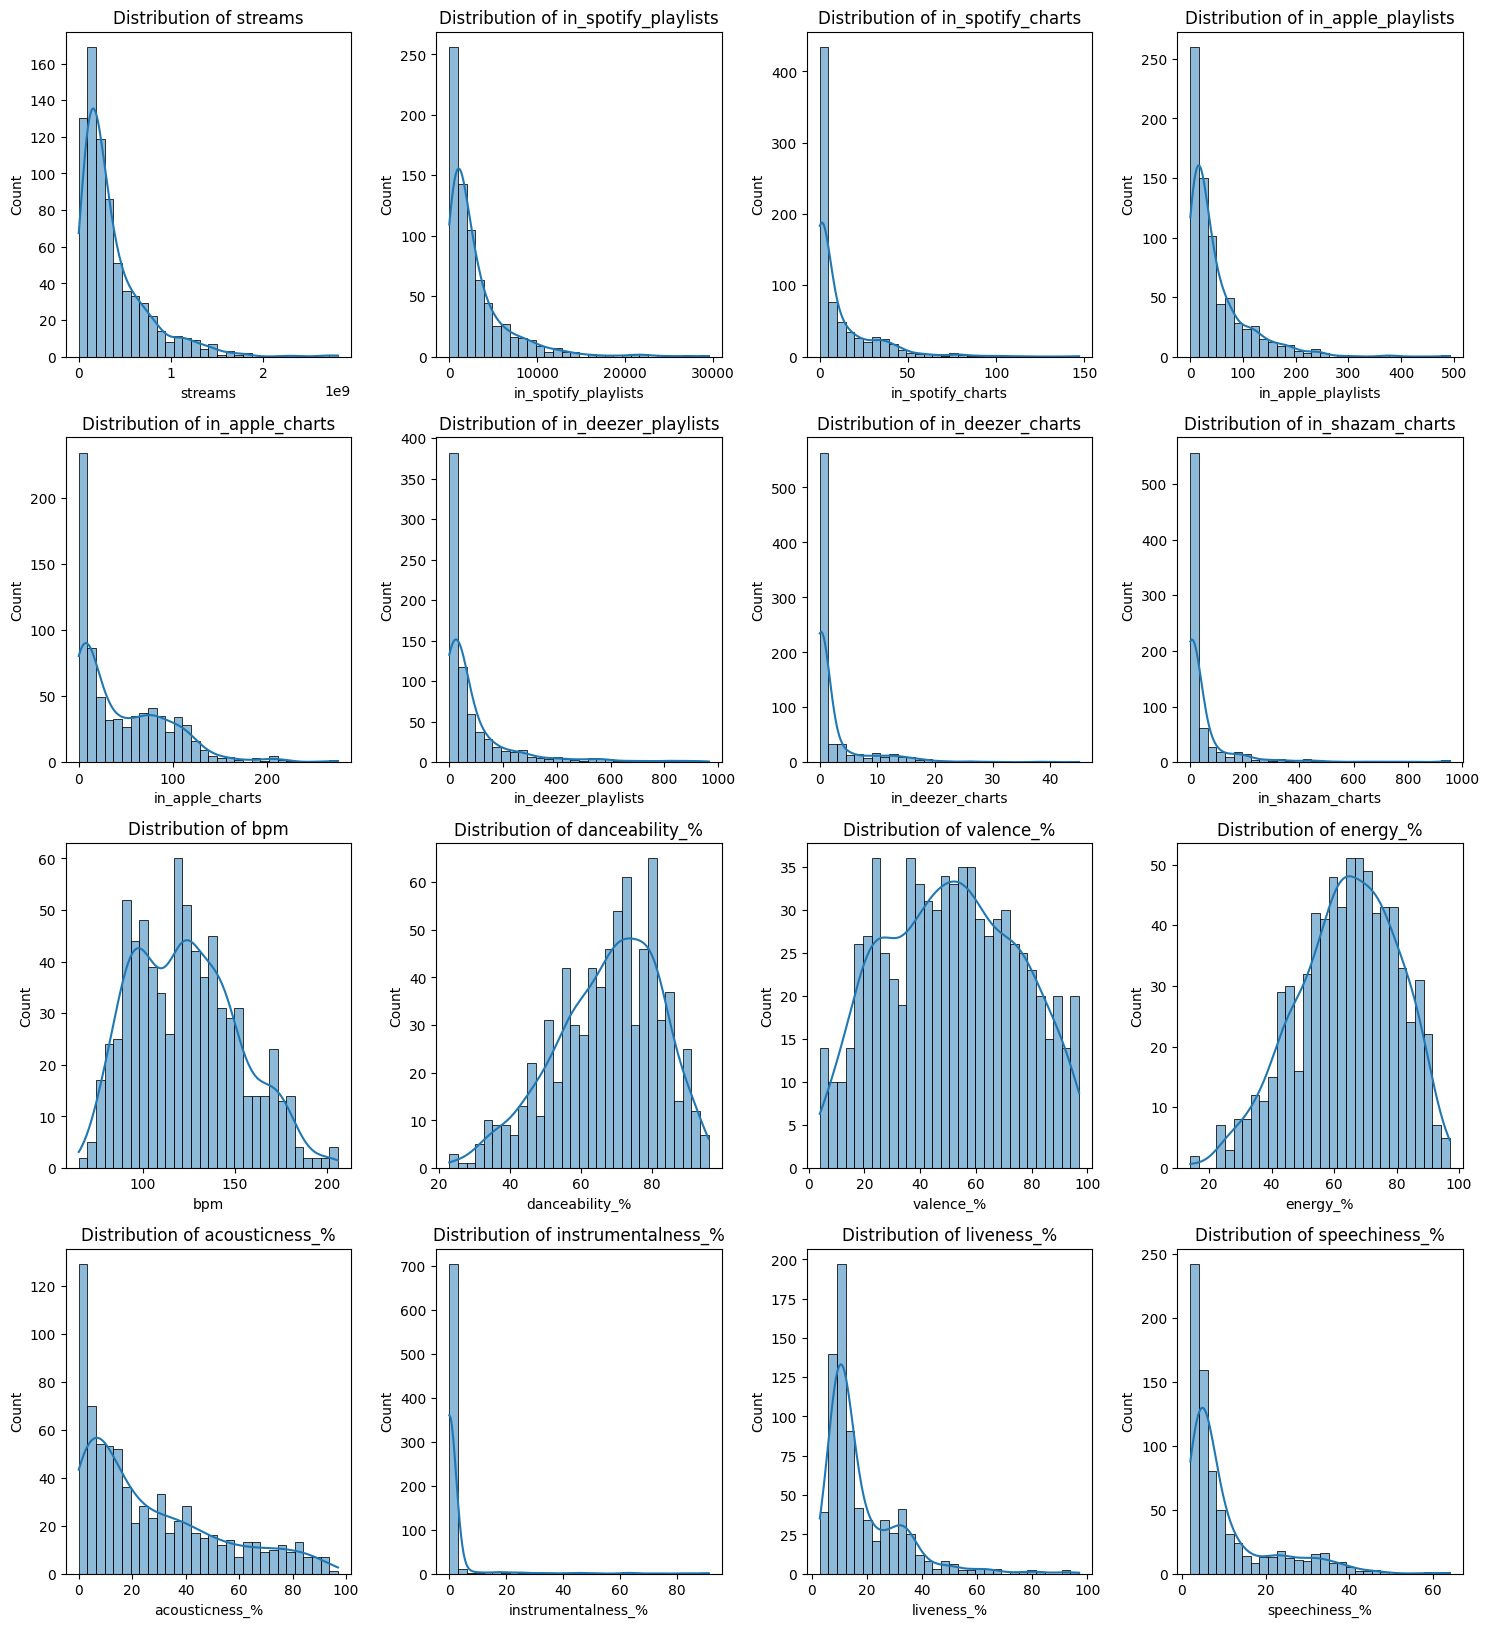

In [ ]:
# Plot distributions for numerical features
numerical_columns = ['streams', 'in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists', 'in_apple_charts',
                     'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm', 'danceability_%', 'valence_%',
                     'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']

plt.figure(figsize=(15, 20))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(5, 4, i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

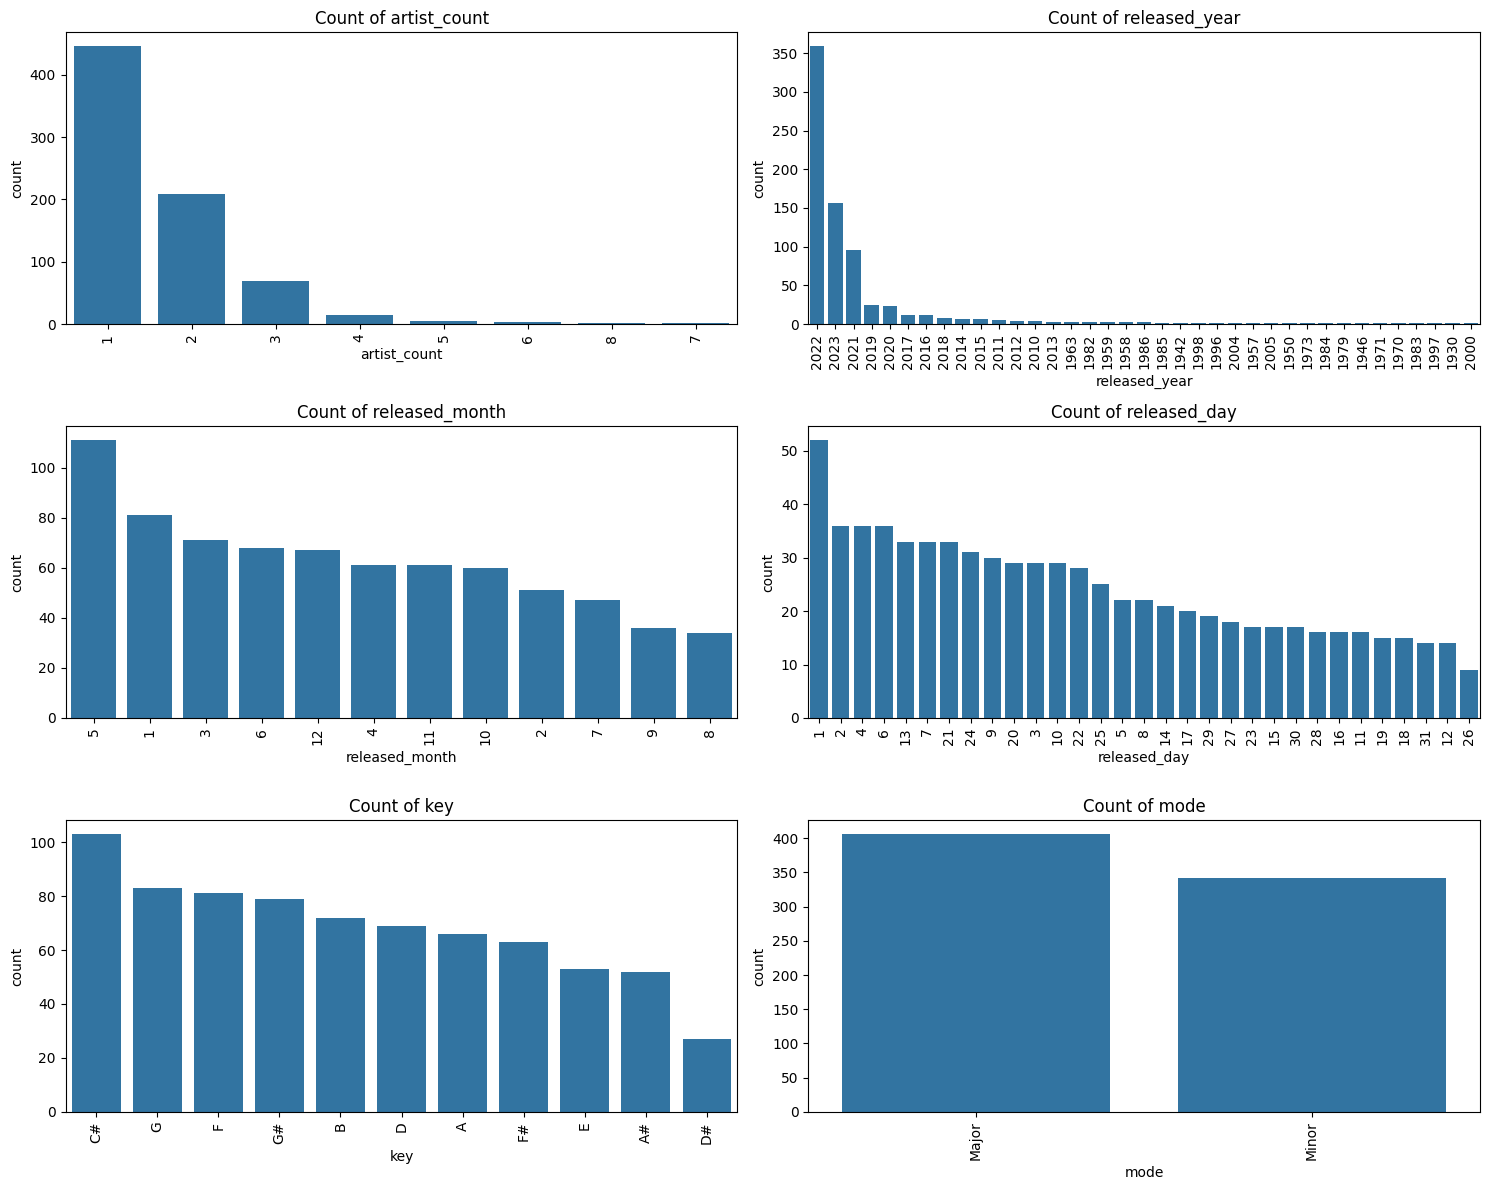

In [ ]:
# Plot counts for categorical features
categorical_columns = ['artist_count', 'released_year', 'released_month', 'released_day', 'key', 'mode']

plt.figure(figsize=(15, 12))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(3, 2, i)
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Count of {col}')
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

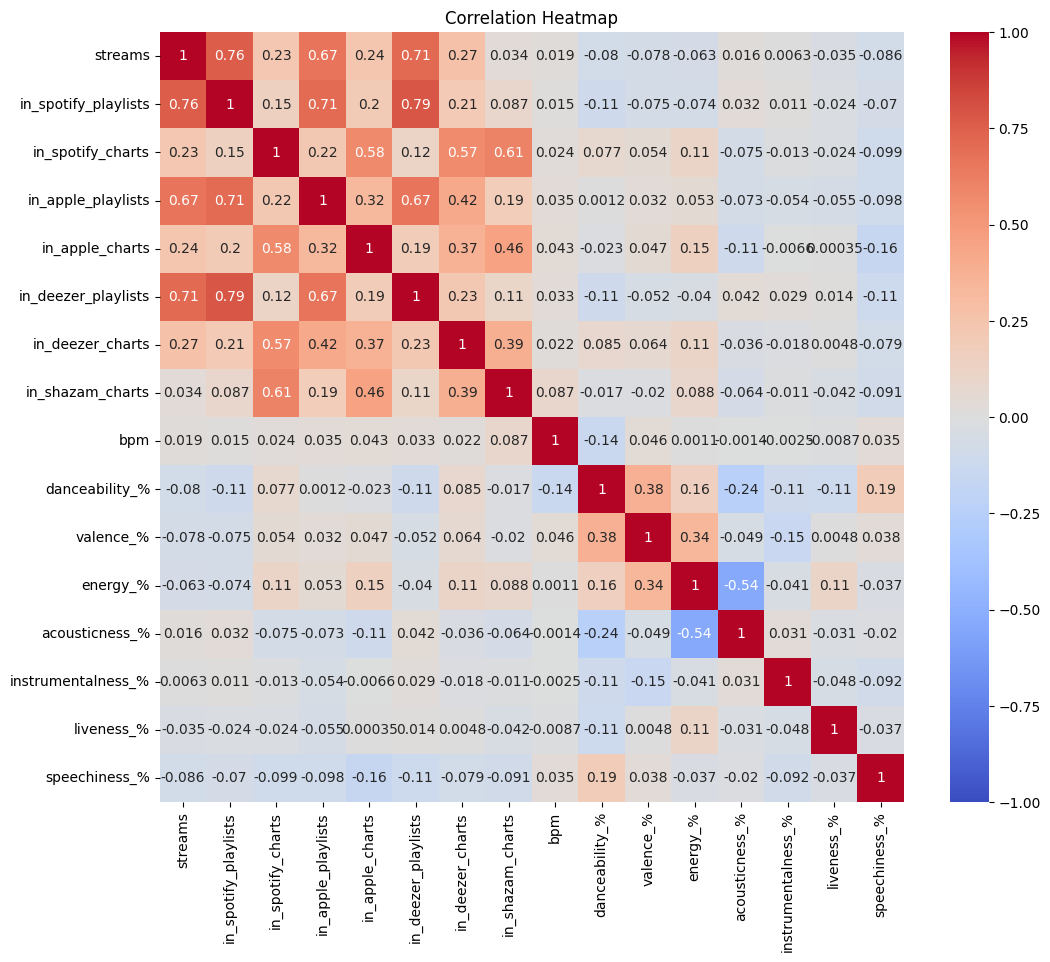

In [ ]:
# Filter DataFrame by numerical columns
numeric_df = df[numerical_columns]

# Plot correlation heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


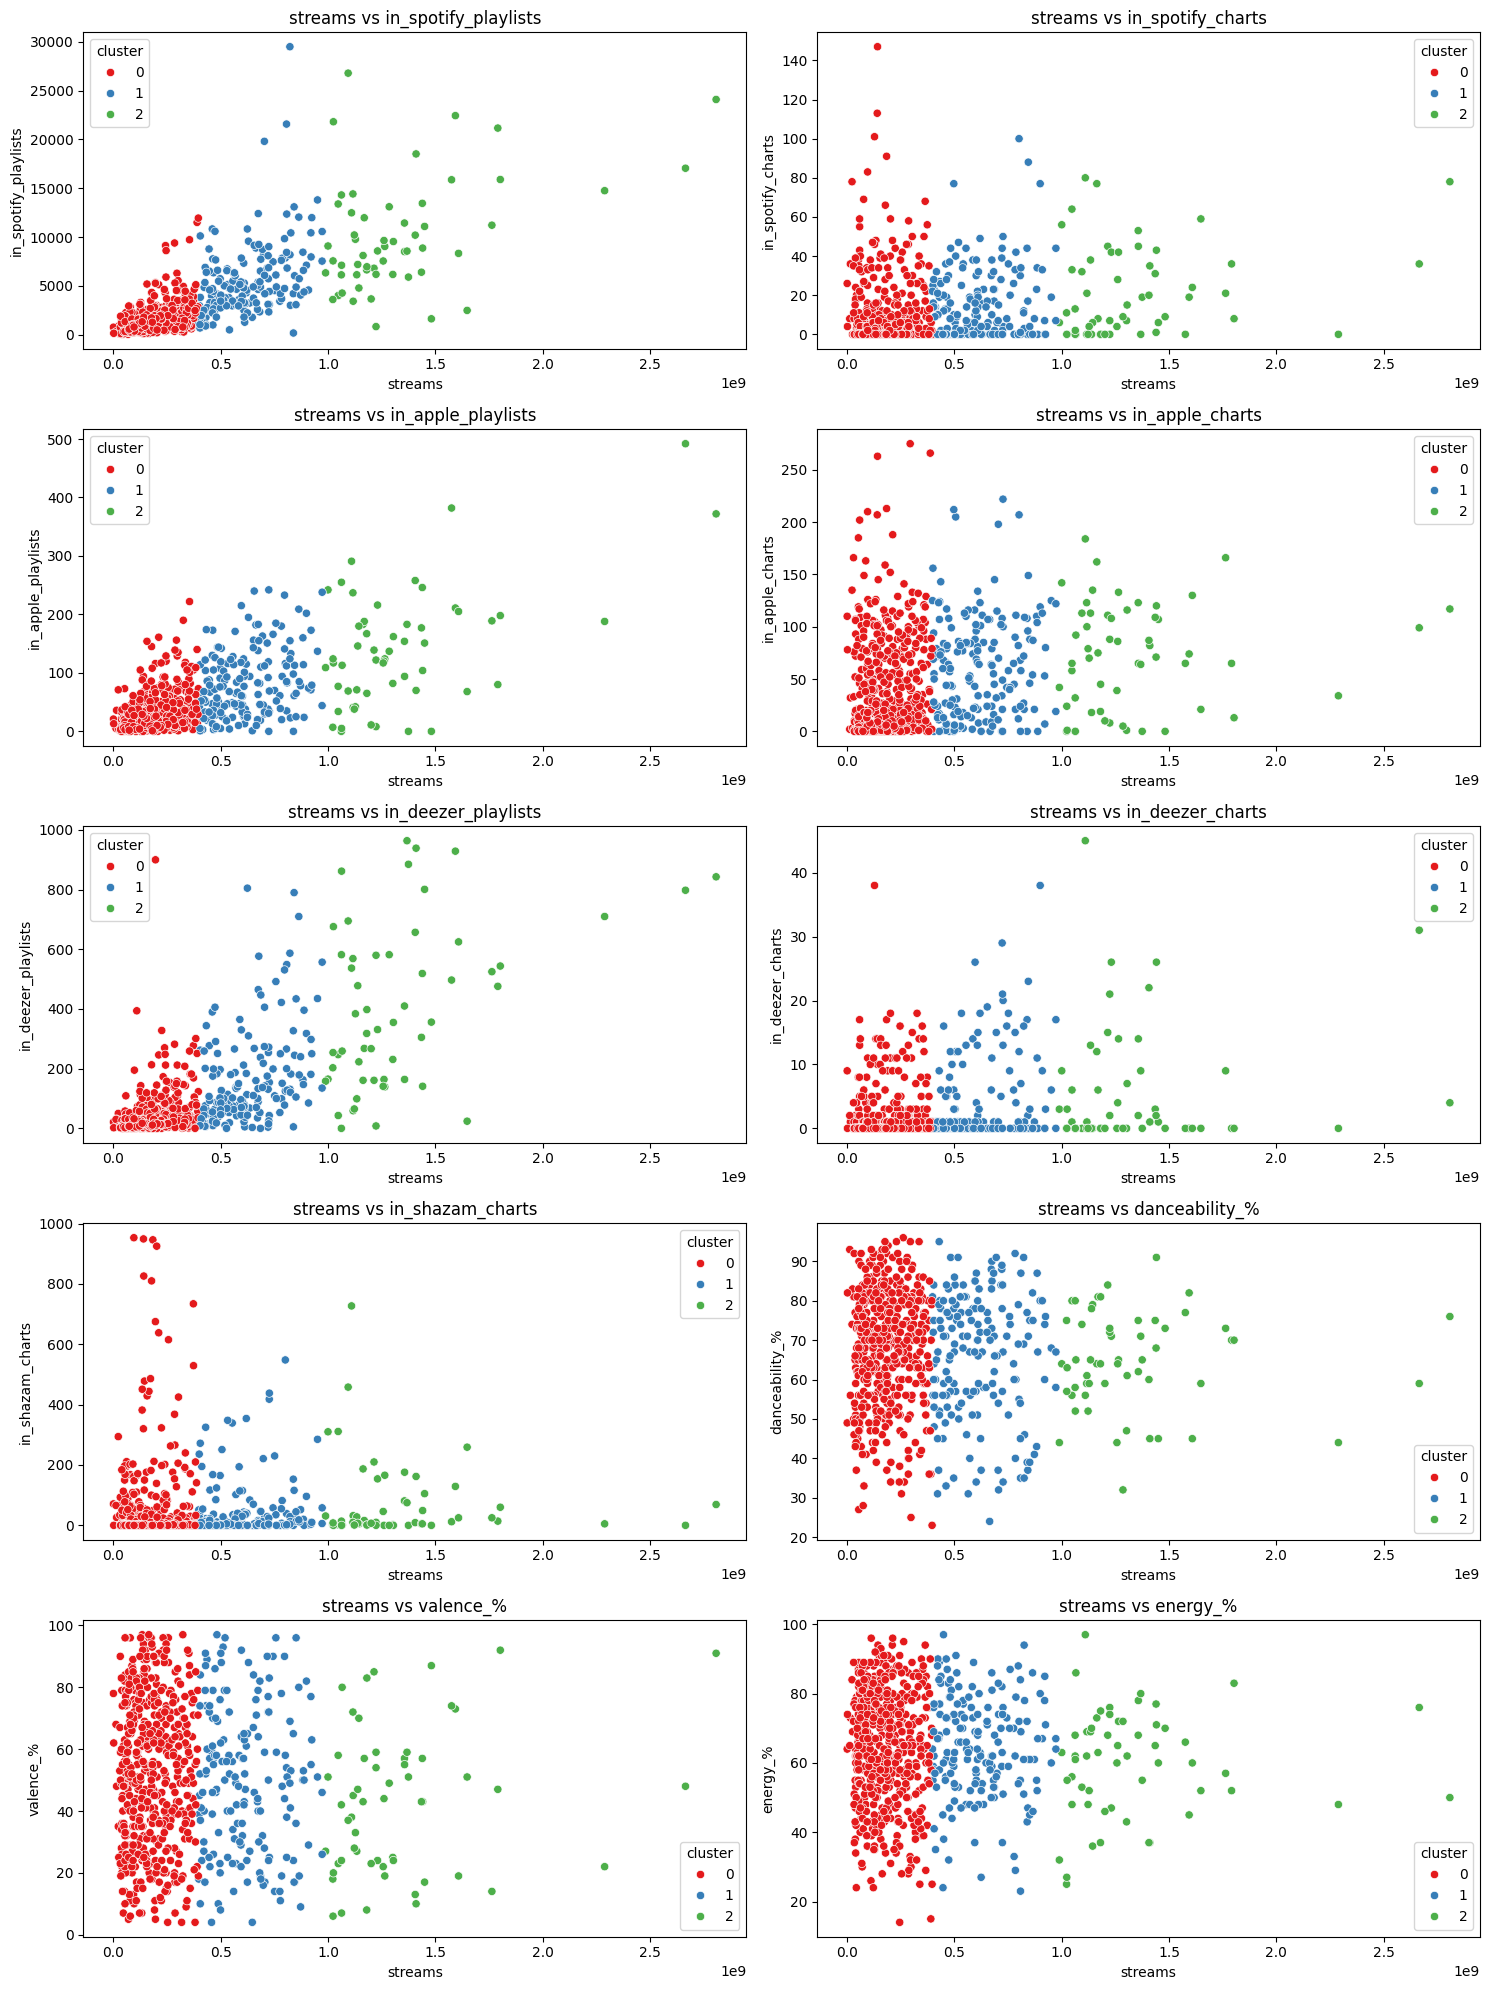

In [ ]:
# Features for clustering
features_for_clustering = ['streams', 'in_spotify_playlists', 'in_spotify_charts',
                           'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists',
                           'in_deezer_charts', 'in_shazam_charts', 'danceability_%',
                           'valence_%', 'energy_%']

# Scatter plots for relationships between features
relationships = [
    ('streams', 'in_spotify_playlists'),
    ('streams', 'in_spotify_charts'),
    ('streams', 'in_apple_playlists'),
    ('streams', 'in_apple_charts'),
    ('streams', 'in_deezer_playlists'),
    ('streams', 'in_deezer_charts'),
    ('streams', 'in_shazam_charts'),
    ('streams', 'danceability_%'),
    ('streams', 'valence_%'),
    ('streams', 'energy_%')
]

# Clustering
kmeans = KMeans(n_clusters=3)  # You can adjust the number of clusters as needed
df['cluster'] = kmeans.fit_predict(df[features_for_clustering])

# Plotting
plt.figure(figsize=(15, 20))
for i, (x, y) in enumerate(relationships, 1):
    plt.subplot(5, 2, i)
    sns.scatterplot(data=df, x=x, y=y, hue='cluster', palette='Set1')
    plt.title(f'{x} vs {y}')
plt.tight_layout()
plt.show()
